#Introduction

This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:

+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


##Import Python Moduls
I will import required modules for this project

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

##Data overview

The next step is to look at data to understand what I'm dealing with

In [2]:
df = pd.read_csv('all_data.csv')
df.head(10)

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
5,Chile,2005,78.4,1.229650e+11
6,Chile,2006,78.9,1.547880e+11
7,Chile,2007,78.9,1.736060e+11
8,Chile,2008,79.6,1.796380e+11
9,Chile,2009,79.3,1.723890e+11


I also want to analyze what countries we have, what is the highest GDP and lowest GDP, where is the highest/lowest life expectancy in numbers and to find out which years are represented in the data, and they are 2000-2015, before starting to build graphs

In [3]:
print(df['Country'].unique())
print(df['Year'].unique())
print("Max GDP:", df['GDP'].max())
print("Min GDP:", df['GDP'].min())
print('Max life expectancy at birth (years):', df['Life expectancy at birth (years)'].max())
print('Min life expectancy at birth (years):', df['Life expectancy at birth (years)'].min())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]
Max GDP: 18100000000000.0
Min GDP: 4415702800.0
Max life expectancy at birth (years): 81.0
Min life expectancy at birth (years): 44.3


#Cleaning Column Name
Looking over the data, there are inconsistencies with the column names. For example, the first two column names are one word each, while the third is five words long! `Life expectancy at birth (years)` is descriptive, which will be good for labeling the axis, but a little difficult to wrangle for coding the plot itself. The `rename` function is used to change the column name to `LEABY`.

In [4]:
df = df.rename({'Life expectancy at birth (years)' : 'LEABY'}, axis = "columns")
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


##Exploraty Plots
We can see that our data is concentrated on the right, which may indicate that the GPP of chatter did not exceed 0.25 trillion dollars. This type of distribution could be described as a power law distribution, which is a common enough distribution that it has its own name.

<Figure size 800x600 with 0 Axes>

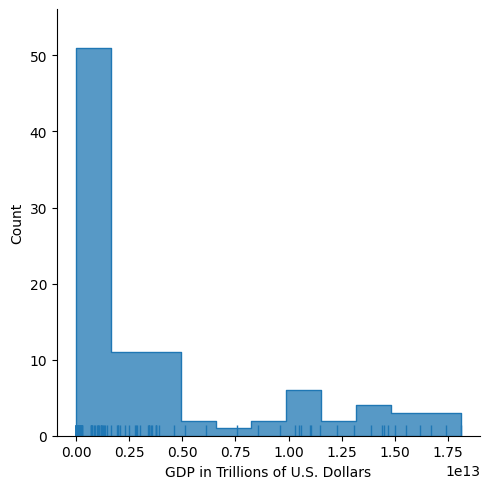

In [5]:
plt.figure(figsize=(8,6))
sns.displot(df.GDP, rug = True, kde=False, element='step')
plt.xlabel("GDP in Trillions of U.S. Dollars")
plt.show()

The next step was to explore LEABY, where we can observe almost the opposite picture, all our data is concentrated on the right

<Figure size 800x600 with 0 Axes>

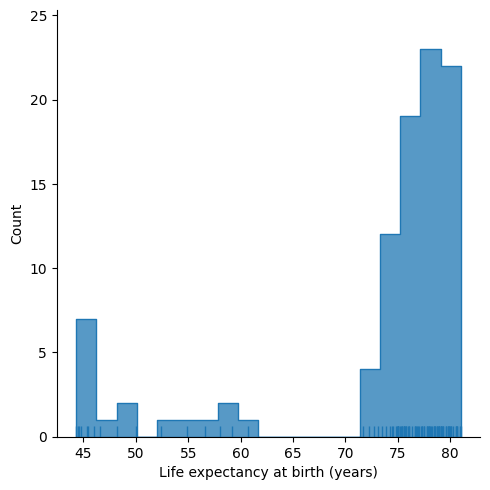

In [6]:
plt.figure(figsize=(8,6))
sns.displot(df.LEABY, rug = True, kde=False, element='step')
plt.xlabel("Life expectancy at birth (years)")
plt.show()

the previous plots do not show data for individual countries, so I will show the data using averages

In [7]:
df_means = df.drop("Year", axis = 1).groupby("Country").mean().reset_index()
df_means

,Country,LEABY,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


Bar plots showing the mean values for each variable are created below.

The first plot is Life Expectancy and all of the countries

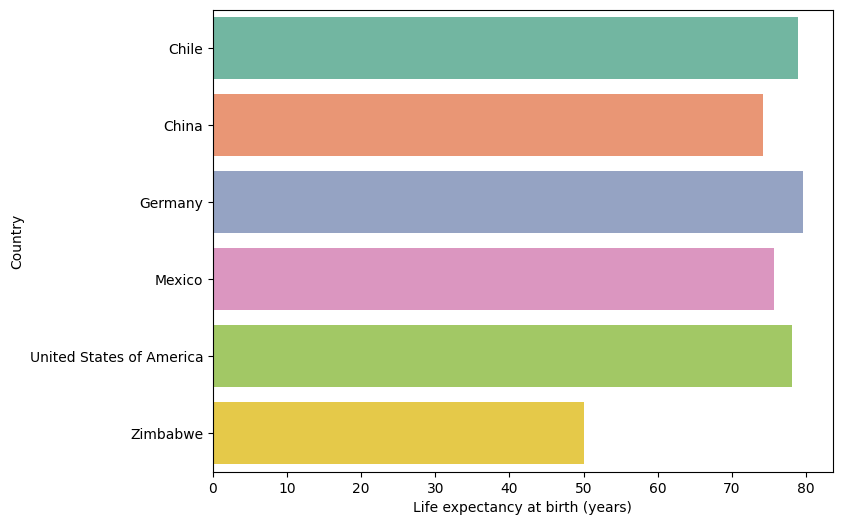

In [16]:
plt.figure(figsize=(8,6))
sns.barplot(x = "LEABY", y = "Country", hue ="Country", legend = False, data=df_means, palette="Set2")
plt.xlabel("Life expectancy at birth (years)")
plt.show()

I will do the same thing with GDP. For the average `GDP` by `Country` it seems that the US has a much higher value compared to the rest of the countries. In this bar plot, Zimbabwe is not even visible where Chile is just barely seen. In comparison the USA has a huge GDP compared to the rest. China, Germany and Mexico seem to be relatively close in figures.

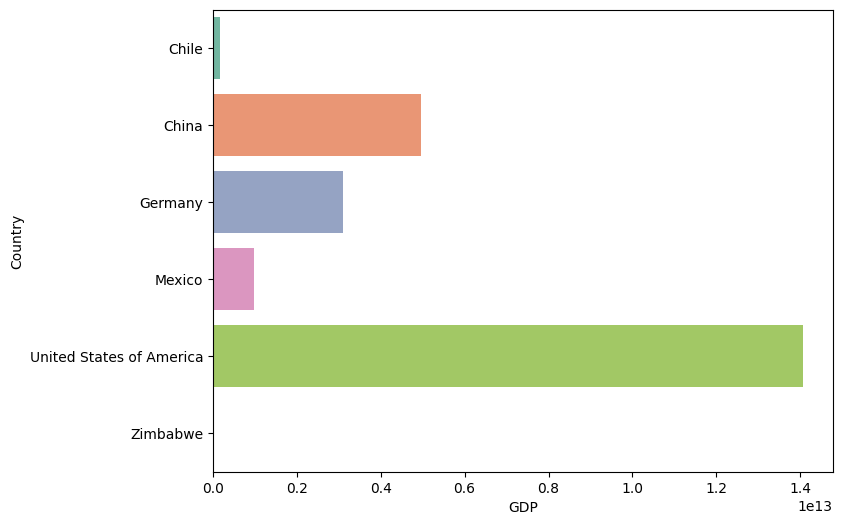

In [11]:
plt.figure(figsize=(8, 6))
sns.barplot(x="GDP", y ="Country", hue ="Country", legend= False, data=df_means, palette="Set2")
plt.show()

##Line Charts
Moving forward, we will analyze GDP and life expectancy (LEABY) data across various years using line charts. Below, countries are distinguished by colors, revealing notable achievements by the United States and China between 2000 and 2015. During this timeframe, China experienced substantial growth, increasing from less than a quarter of a trillion dollars to one trillion dollars. Other countries did not exhibit similar growth during this period.


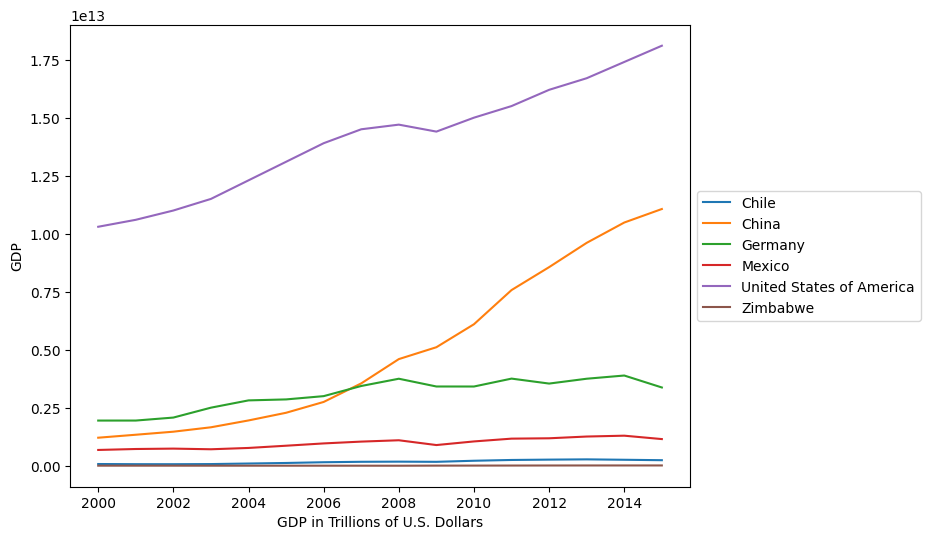

In [12]:
plt.figure(figsize=(8,6))
sns.lineplot(x = "Year", y = "GDP", hue="Country", data=df)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("GDP in Trillions of U.S. Dollars")
plt.show()

Now it’s worth taking a closer look at each country and using individual graphs and it possible draw conclusions about the economic growth of the countries. We can observe that the level of GDP of the USA(in 2008-2009 we can observe a crisis), China and Zimbabwe(after 2008 economic growth began) continues to grow, unlike other countries

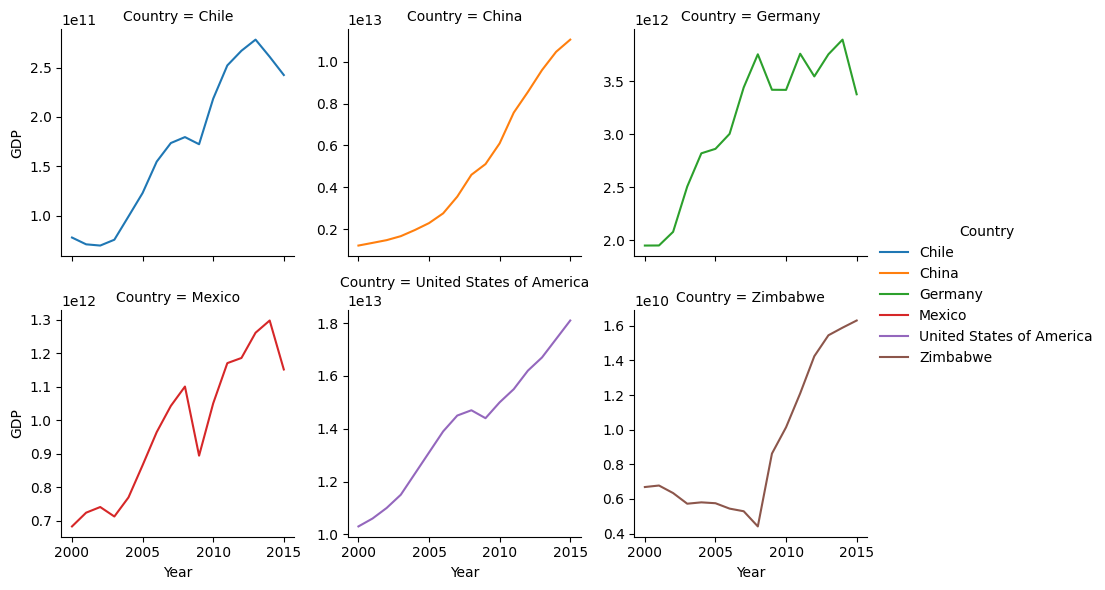

In [27]:
graphGDP = sns.FacetGrid(df, col ="Country", hue="Country", sharey= False, col_wrap = 3)
graphGDP = (graphGDP.map(sns.lineplot, "Year", "GDP").add_legend().set_axis_labels("Year", "GDP"))
graphGDP

The chart below shows now looks at life expectancy over the years. The chart shows that every country has been increasing their life expectancy, but Zimbabwe has seen the greatest increase after a bit of a dip around 2004.

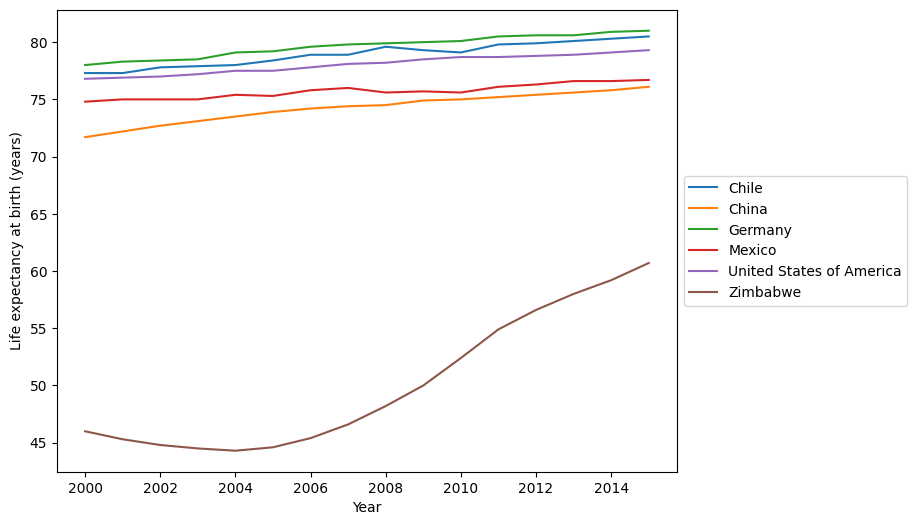

In [32]:
plt.figure(figsize=(8,6))
sns.lineplot(x = "Year", y = "LEABY", hue = "Country", data=df)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Life expectancy at birth (years)")
plt.show()

As with the previous breakdown of GDP by country, the graph below shows life expectancy by country. Clearly, Chile and Mexico experienced declines in life expectancy around the same time, which could be explored further. Moreover, seemingly linear changes were in fact not so smooth for some countries.

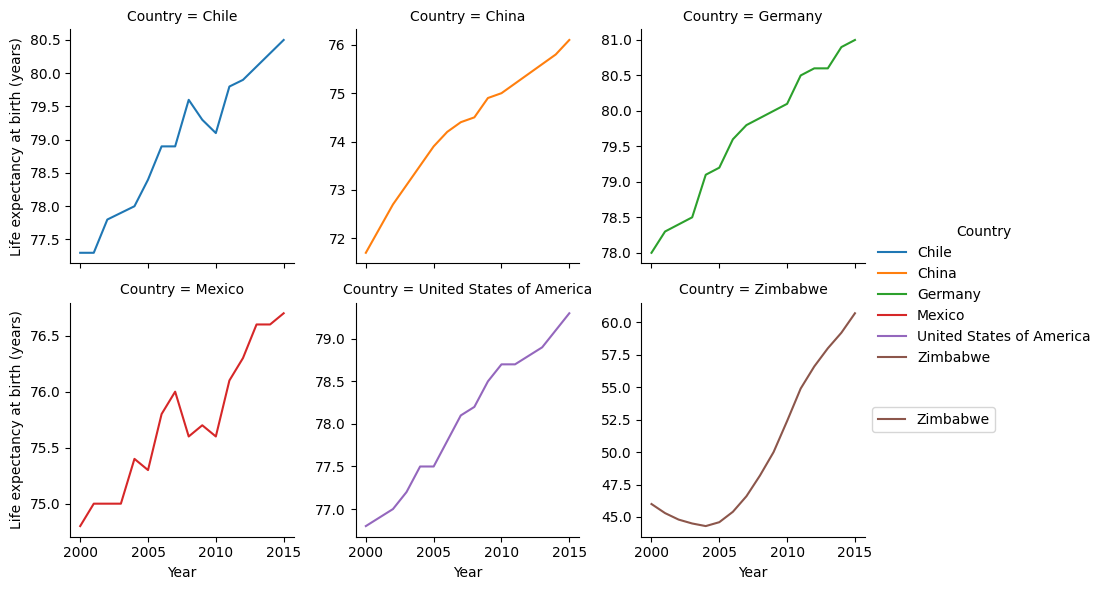

In [33]:
graphLEABY = sns.FacetGrid(df, col = "Country", hue = "Country", sharey = False, col_wrap = 3)
graphLEABY = (graphLEABY.map(sns.lineplot, "Year", "LEABY").add_legend().set_axis_labels("Year", "Life expectancy at birth (years)"))
graphLEABY

Now I’m finally comparing `GDP` and `Life expectancy at birth` for country.
In the chart below, it looks like the previous charts where GDP for Zimbabwe is staying flat, while their life expectancy is going up. For the other countries they seem to exhibit a rise in life expectancy as GDP goes up. The US and China seem to have very similar slopes in their relationship between GDP and life expectancy.

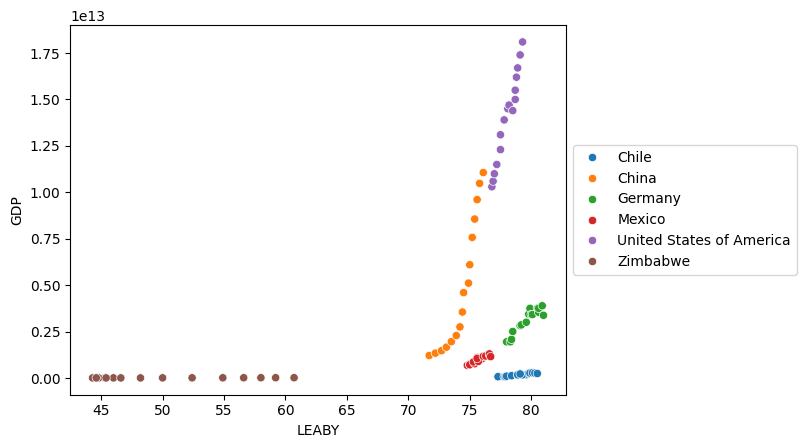

In [34]:
sns.scatterplot(data = df, x= "LEABY", y="GDP", hue="Country")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Life expectancy at birth (years)")
plt.show()

As in the previous plots, I will look at each country in more detail so that the data is visible better than in the general graph. Looking at individual countries, most countries such as the US, Mexico and Zimbabwe have a linear relationship between GDP and life expectancy. On the other hand, China's curve has a slightly exponential curve, while Chile's curve appears slightly logarithmic. However, in general, one can see an increase in GDP and life expectancy, showing a positive correlation.

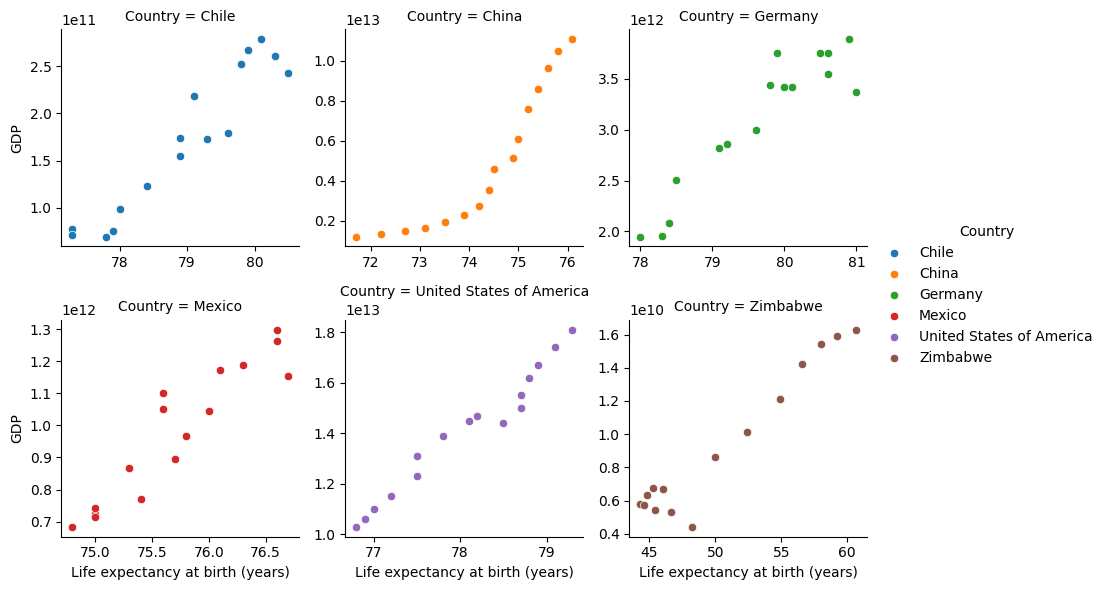

In [37]:
grahpGDP_LEABY = sns.FacetGrid(df, col = "Country", hue = "Country",sharex = False, sharey= False, col_wrap = 3)
grahpGDP_LEABY = (grahpGDP_LEABY.map(sns.scatterplot, "LEABY", "GDP").add_legend().set_axis_labels("Life expectancy at birth (years)", "GDP"))
grahpGDP_LEABY

##Conclusions
This project was able to produce quite a few data visualizations.

The project was also able to answer some of the questions posed at the beginning:

- Has life expectancy increased over time in the six countries?
       - Yes, Zimbabwe is experiencing the greatest growth.
- Has GDP increased over time in the six countries?
       - GDP also increased in all countries on our list, especially in China.
- Is there a correlation between GDP and life expectancy in a country?
       - Yes, in the countries on our list there is a positive correlation between GDP and life expectancy.
- What is the average life expectancy in these countries?
       - The average life expectancy in all countries was between 70 and 70 years, with the exception of Zimbabwe, where it was 50 years.
- How is this life expectancy distributed?
       - life expectancy had a shift to the left, or most observations were to the right.